In [1]:
#pip install os-sys
#pip install pandas
#pip install numpy

In [159]:
import requests
from bs4 import BeautifulSoup

# Bir istekte bulunarak websayfasına eriş
url = 'https://attack.mitre.org/groups/'
response = requests.get(url)

# Websayfasının HTML'ini ayrıştır
soup = BeautifulSoup(response.text, 'html.parser')

# Verileri içeren tablo bul
table = soup.find('table')

# Tablodaki tüm satırları bul
rows = table.find_all('tr')

# İsimleri ve ülkeleri saklamak için bir liste 
data = [ 'North Korean','South Korean','China','Chinese', 'Canada','Iranian','North Korean',
         'South Korean','Russia','United Arab Emirates', 'Brazil', 'India', 'Argentina', 'Kazakhstan', 'Algeria',
         'Democratic Republic of the Congo', 'Greenland', 'Mexico', 'Indonesia',
         'Sudan', 'Libya', 'Iran', 'Mongolia', 'Peru', 'Chad', 'Nigerian', 'Angola',
         'Mali', 'South Africa', 'Ethiopia', 'Bolivia', 'Mauritania',
         'Egypt', 'Tanzania', 'Nigeria', 'Venezuela', 'Pakistan', 'Turkmenistan',
         'Chile', 'Zambia', 'Afghanistan', 'Somalia', 'Central African Republic',
         'Ukraine', 'Botswana', 'Madagascar', 'Kenya', 'France', 'Thailand', 'Mozambique',
         'Turkey', 'Papua New Guinea', 'Sweden', 'United Arab Emirates',
         'Iraq', 'Paraguay', 'Zimbabwe', 'Japan', 'Germany', 'South Sudan', 'Norway',
         'Vietnam', 'Finland', 'Cameroon', 'Ivory Coast', 'Poland', 'Democratic People\'s Republic of Korea',
         'Uzbekistan', 'Romania', 'Malawi', 'Gambia', 'Philippines', 'Guinea', 'Greece', 'Cuba', 'Uganda',
         'Belarus', 'Bulgaria', 'Honduras', 'Portugal', 'Austria', 'Serbia', 'Tajikistan', 'Slovakia', 'Switzerland',
         'Laos', 'Kyrgyzstan', 'Lebanese' ]

def remove_suffix(country):
    # Eğer ülke adı "Chinese" ise
    if country == "Chinese":
        # "China" döndür
        return "China"
    # Eğer ülke adı "ian" ile bitiyorsa
    if country == "Iranian":
        return "Iran"
    if country== "Nigerian" : 
        return "Nigeria"
    # Eğer ülke adı "ese" ile bitiyorsa
    elif country.endswith("ese"):
        # Son üç karakteri kaldırarak ülke adını döndür
        return country[:-3]
    # Hiçbir şart sağlanmıyorsa
    else:
        # Orijinal ülke adını döndür
        return country



with open("output.txt", "w") as f:
    # Tablo içindeki her satır için döngüye gir
    for row in rows:
        # Satırdaki hücreleri bul
        cells = row.find_all('td')

        # Eğer satırda hücreler varsa
        if cells:
            # İsim hücresinden metni al
            name = cells[1].text

            # Açıklama hücresinden metni al
            desc = cells[3].get_text()
        
            # Bayrağı False olarak ayarla
            found = False

            # Ülke listesi içinde döngüye gir
            for country in data:
                # Eğer ülke Açıklama sütununda varsa
                if country in desc:
                    # Bayrağı True olarak ayarla
                    found = True

                    # Ülke adındaki son eki silmek için
                    country = remove_suffix(country)

                    # İsim ve ülkeyi output dosyasına yaz
                    f.write(f"Name={name} Country={country}\n")
                    break

            #False (ülke adı bulunamadı) ise, Name ve ülke için null değeri olarak output dosyasına yaz
            if not found:
                f.write(f"Name={name} Country=null\n")
                


In [160]:
import os
import pandas as pd
import numpy as np

list_of_groups = []
for row in rows:
    # Her satırdaki tüm hücreleri bul
    cells = row.find_all('td')
    # Her hücrenin içeriğini al
    if cells:
        name = cells[1].text.strip()
        description = cells[3].text
        found = False
        for country in data:
            if country in description:
                found = True
                country = remove_suffix(country)
                ls = [name, country]
                break
        if not found:
            ls = [name, 'Unknown']
        list_of_groups.append(ls)

def mitre_to_excel(mitre, wt="w"):
    print("Converting mitre to excel...")
    pwd = os.getcwd()
    path = pwd + "/mitre-groups.xlsx"
    df = pd.DataFrame(mitre, columns=["Groups", "Country"])
    with pd.ExcelWriter(path) as writer:
        print("Writing to excel...")
        df.to_excel(writer, sheet_name="Groups&Country", index=False, header=False)
    
mitre_to_excel(list_of_groups)

Converting mitre to excel...
Writing to excel...


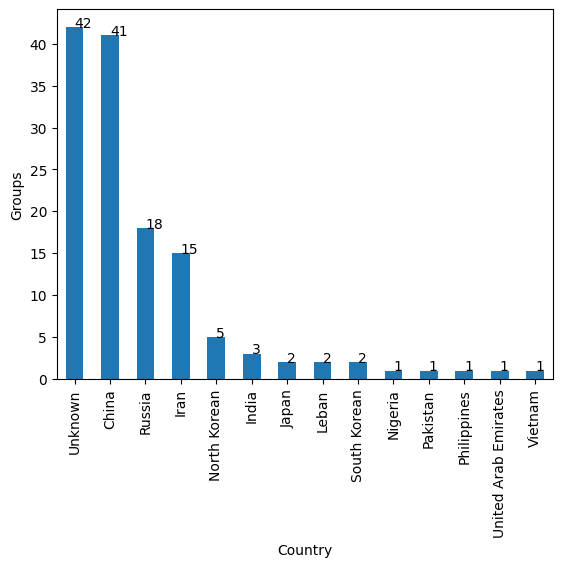

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# xlsx dosyasını oku ve verileri dataframe içinde sakla
df = pd.read_excel("mitre-groups.xlsx", header=None, names=["Groups", "Country"])

# verileri country kolonuna göre grupla ve groups kolonunda kaç adet olduğunu say
group_count = df.groupby("Country")["Groups"].count().sort_values(ascending=False)

# verileri bar grafiği olarak görselleştir
group_count.plot(kind="bar")

# x ve y ekseninin adlarını ayarla
plt.xlabel("Country")
plt.ylabel("Groups")
# sütun değerlerini ekle
for index, value in enumerate(group_count):
    plt.text(index, value, str(value))
plt.show()

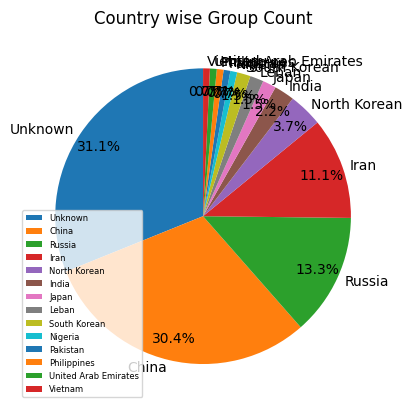

In [161]:

import matplotlib.pyplot as plt

group_count = df.groupby("Country")["Groups"].count().sort_values(ascending=False)

# grafik için boş bir alan oluştur
fig, ax = plt.subplots()

# verileri pasta dilimli grafik olarak görselleştir
ax.pie(group_count, labels=group_count.index, autopct='%1.1f%%',
       startangle=90, pctdistance=0.85, labeldistance=1.05)


ax.legend(loc='lower left',fontsize=6)

# grafiğin başlığı
plt.title("Country wise Group Count")

# grafiği göster
plt.show()




In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Open the file and read its contents
with open("output.txt", "r") as f:
    text = f.read()

# Generate the word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [141]:
######################################################TEST PLACE###########################################

In [142]:

with open("output.txt", "w") as f:
   
    for row in rows:
        cells = row.find_all('td')
        if cells:
            name = cells[1].text
            desc = cells[3].text
            found = False
            
            for country in data:
               
                if country in desc:
                   
                    found = True
                    country = remove_suffix(country)

                    f.write(f"Name: {name} Country: {country}\n")
                    break
                    
            if not found:
                f.write(f"Name: {name} Country: null\n")


In [14]:
# Bir ülke adındaki soneki sil
def remove_suffix(country):
     # Eğer ülke adı "Chinese" ise
    if country == "Chinese":
        # "China" döndür
        return "China"
    # Eğer ülke adı "ian" veya "ese" ile bitiyorsa
    if country.endswith("ian") or country.endswith("ese"):
        # Son üç karakteri kaldırarak ülke adını döndür
        return country[:-3]
       
        
    # Eğer ülke adı "an" ile bitiyorsa
    elif country.endswith("an"):
        # Son iki karakteri kaldırarak ülke adını döndür
        return country[:]
    # Hiçbir şart sağlanmıyorsa
    else:
        # Orijinal ülke adını döndür
        return country

In [ ]:
import openpyxl


workbook = openpyxl.Workbook()

sheet = workbook.active

sheet.title = "MITRE ATT&CK Groups"


sheet['A1'] = "Name"
sheet['B1'] = "Country"


row_num = 2


with open("output.txt", "r") as f:
    for line in f:
        if line.startswith("Name: "):
            
            name = line[6:].strip()
            line = f.readline()
            
            if line.startswith("Country: "):

                country = line[9:].strip()
                sheet.cell(row=row_num, column=1).value = name
                sheet.cell(row=row_num, column=2).value = country
                
                row_num += 1



In [76]:
import requests
from bs4 import BeautifulSoup

# Bir istekte bulunarak websayfasına eriş
url = 'https://attack.mitre.org/groups/'
response = requests.get(url)

# Websayfasının HTML'ini ayrıştır
soup = BeautifulSoup(response.text, 'html.parser')

# Verileri içeren tablo bul
table = soup.find('table')

# Tablodaki tüm satırları bul
rows = table.find_all('tr')

# İsimleri ve ülkeleri saklamak için bir liste oluştur
data = ['Russia', 'Canada', 'China', 'Brazil', 'Australia', 'India', 'Argentina', 'Kazakhstan', 'Algeria',
                     'Democratic Republic of the Congo', 'Greenland', 'Mexico', 'Indonesia',
                     'Sudan', 'Libya', 'Iran', 'Mongolia', 'Peru', 'Chad', 'Niger', 'Angola',
                     'Mali', 'South Africa', 'Colombia', 'Ethiopia', 'Bolivia', 'Mauritania',
                     'Egypt', 'Tanzania', 'Nigeria', 'Venezuela', 'Pakistan', 'Turkmenistan'
                     'Chile', 'Zambia', 'Afghanistan', 'Somalia', 'Central African Republic',
                     'Ukraine', 'Botswana', 'Madagascar', 'Kenya', 'France', 'Thailand', 'Mozambique',
                     'Spain', 'Tunisia', 'Turkey', 'Papua New Guinea', 'Sweden', 'United Arab Emirates',
                     'Iraq', 'Paraguay', 'Zimbabwe', 'Japan', 'Germany', 'South Sudan', 'Morocco', 'Norway',
                     'Vietnam', 'Finland', 'Cameroon', 'Ivory Coast', 'Poland', 'Democratic People\'s Republic of Korea',
                     'Uzbekistan', 'Romania', 'Malawi', 'Gambia', 'Philippines', 'Guinea', 'Greece', 'Cuba', 'Uganda',
                     'Belarus', 'Bulgaria', 'Honduras', 'Portugal', 'Austria', 'Serbia', 'Tajikistan', 'Slovakia', 'Switzerland',
                     'Laos', 'Kyrgyzstan', 'PÃ©rou','Korean','Chinese']


In [66]:
# output.txt dosyasını aç
with open('output.txt', 'r') as f:
    # Dosyayı satır satır oku
    lines = f.readlines()

# China ya ait name leri topla
names = []
for line in lines:
    # Satır "Name: " ile başlıyorsa
    if line.startswith('Name='):
        # Satırın ilk 6 karakterini kaldır ve trim et
        name = line[6:]
   
        # Sonraki satır "Country: China" ise
        if lines[lines.index(line)+1] == "Country= China\n":
            # Name'i names listesine ekle
            names.append(name)

# names listesini yazdır
print(names)


[]


In [67]:

def remove_suffix(country):
    
    if country.endswith("ian") or country.endswith("ese"):
        
        return country[:-3]
   
    elif country.endswith("an"):

        return country[:-2]
   
    else:
       
        return country


print(remove_suffix("Chinese"))
print(remove_suffix("Russian")) 
print(remove_suffix("Iranian")) # Output: "Iran
print(remove_suffix("North Korean")) 
print(remove_suffix("United States")) 

Chin
Russ
Iran
North Kore
United States
